In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [32]:
df=pd.read_csv('data cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [33]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [36]:
# Check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

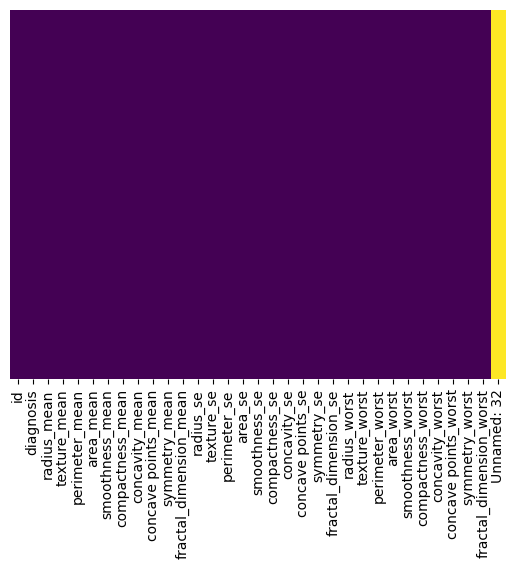

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# is used to visually check missing values (NaNs) in your DataFrame using a heatmap.
# df.isnull()
# This returns a DataFrame of the same shape as df, but with True for each missing value and False otherwise.

# sns.heatmap(...)
# This creates a heatmap using seaborn (sns) where:

# True (missing values) are shown as one color (e.g., yellow/purple depending on the colormap),

# False (non-missing) are another color.

# yticklabels=False
# Hides row labels to make the plot cleaner.

# cbar=False
# Removes the color bar legend on the right.

# cmap='viridis'
# Uses the 'viridis' color map (a nice gradient from dark purple to yellow).
# yticklabels=False ka matlab:
# Yeh option heatmap ke left side par jo row numbers (yaani 0,1,2,3...) likhe hote hain, unhein hide kar deta hai.

# Jab data mein rows zyada hon (jaise 100 se bhi zyada), to har row ka label dikhana graph ko messy bana deta hai.

# Is liye hum yticklabels=False likhtay hain taake graph saaf aur simple lage.
# cbar=False ka matlab:
# cbar ka matlab hai color bar, jo heatmap ke side mein ek line hoti hai — wo batata hai ke kaunsa rang kis cheez ko represent karta hai.

# Lekin jab hum sirf NaN (missing) values check kar rahe hon, to bar zaroori nahi hoti. Is liye cbar=False likh ke usay hide kar detay hain.

# Is se graph aur bhi clean ban jata hai.

In [41]:
# drop id empty column
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [42]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [45]:
# turn target variable into 1s and 0
df.diagnosis=[1 if value=='M' else 0 for value in df.diagnosis]
# Yeh conversion zaroori hoti hai jab aap machine learning model lagana chahte hain, kyun ke models usually numbers se kaam karte hain — strings se nahi.

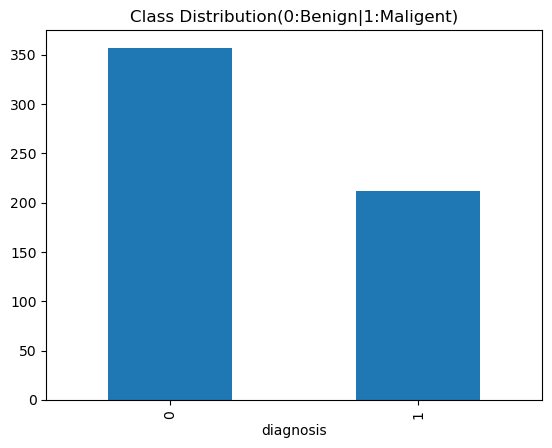

In [46]:
# turn the target variable into categorical data
df['diagnosis']=df['diagnosis'].astype('category',copy=False)
plot=df['diagnosis'].value_counts().plot(kind='bar',title='Class Distribution(0:Benign|1:Maligent)')
fig=plot.get_figure()
# Yeh line diagnosis column ko category type mein convert kar rahi hai.

# astype('category') ka matlab hai ke hum Pandas ko batate hain ke is column mein limited aur repeating values hain (jaise 0 aur 1), is liye isse category samjha jaye.

# Isse memory efficient ban jata hai aur kuch algorithms ko speed milti hai.

# copy=False ka matlab hai ke woh naye column ki copy nahi banayega, balkay original ko hi convert karega.
# df['diagnosis'].value_counts():

# Yeh dekhta hai ke 0 aur 1 kitni dafa aayen hain column mein.

# Example: 357 benign (0) aur 212 malignant (1) ho sakte hain.

# .plot(kind='bar', ...):

# Yeh un values ka bar chart banata hai.

# title='Class Distribution(0:Benign|1:Malignant)' → chart ka title set karta hai.

# Yeh line chart (jo plot banaya gaya hai) uska Figure object return karti hai.

# fig variable mein yeh figure object store hota hai.

# Yeh useful hota hai agar aap baad mein fig.savefig() se us chart ko file mein save karna chahein.




In [47]:
# preparing the model
y=df['diagnosis']
x=df.drop(['diagnosis'],axis=1)

In [48]:
# Create a scaler object
scaler=StandardScaler()
# Fit the scaler to the data and transform the data
x_scaled=scaler.fit_transform(x)
# x_scaled is now a numpy array with normalized data

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
# Create logistic regression model
lr=LogisticRegression()
# Train the model on the training data
lr.fit(x_train,y_train)
# Predict the target variable on the test data
y_pred=lr.predict(x_test)
# Logistic Regression ka use binary classification problems ke liye hota hai.

# fit() se training hoti hai.

# predict() se new data ka prediction hota hai.

In [51]:
from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the model
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.98


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



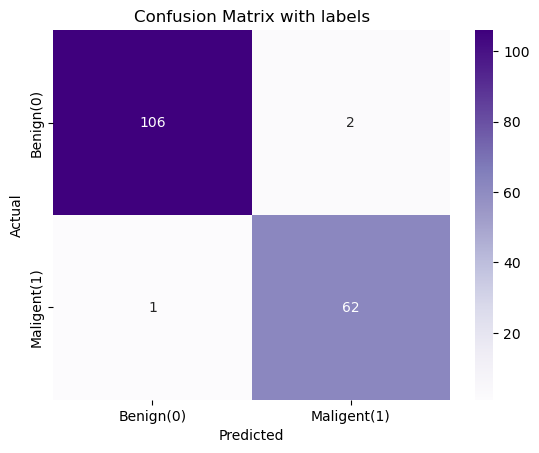

In [54]:
cm=confusion_matrix(y_test,y_pred)  #Ye line confusion matrix bana rahi hai jo ye batata hai:Model ne kitne bar sahi predict kiya.Kitne bar galat predict kiya
labels=['Benign(0)','Maligent(1)']
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',xticklabels=labels,yticklabels=labels)   #Ye line matrix ko heatmap ke form mein draw kar rahi hai:
# annot=True → numbers matrix ke boxes ke andar likhe honge
# fmt='d' → numbers integer format mein honge
# cmap='Purples' → purple color ka heatmap use hoga
# xticklabels aur yticklabels → axis par class labels show honge
plt.title('Confusion Matrix with labels')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Agar Confusion Matrix is tarah ka hai:

#       Predicted
#          0   1
# Actual  -------
#   0     90   5
#   1     3    52
# To iska matlub:

# 90 bar model ne sahi benign (0) pe benign (0) predict kiya

# 5 bar model ne benign (0) ko galti se malignant (1) predict kiya

# 3 bar model ne malignant (1) ko galti se benign (0) predict kiya

# 52 bar model ne sahi malignant (1) pe malignant (1) predict kiya

